In [28]:
import torch
import torch.nn as nn
import torch.nn.init as nn_init
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from DataLoader import data_loader
import torchvision.transforms as transforms
from SegNet import SegNet

In [29]:
root = './'
mode = 'test'
output_size = (450, 900)  # (height, width)
batch_size = 2
class_out_num = 8
class_num = np.arange(-1, 34)
load_file_name = './Models/checkpoint_with_epoch_00007_fixedweight_Adam.pth.tar'

Transform_data = transforms.Compose([transforms.Resize(output_size),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                    ])
Transform_lbl  = transforms.Compose([transforms.Resize(output_size),
                                    ])
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device:',device)
net = SegNet(class_num = class_out_num, img_size = output_size)
net = net.to(device)

# Load SegNet
checkpoint = torch.load(load_file_name)
epoch_s = checkpoint['epoch'] + 1
net.load_state_dict(checkpoint['net_dict'])
lrinit = checkpoint['lrinit']
lrinit *= 2 ** (epoch_s - 1)
learn_r = checkpoint['learn_r']
optim_model = checkpoint['optim_model']
loss_list = checkpoint['loss_list']
loss_valid = checkpoint['loss_valid']

criteria = nn.CrossEntropyLoss()

device: cuda:0


In [30]:
def output_show(train_ori, train_lbl, output, mode):
    import matplotlib.pyplot as plt
    #img = train_ori.cpu().squeeze(0).permute(1,2,0).numpy()
    img = train_ori
    
    plt.figure(figsize = (16.2, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title(mode + '_ori')
    
    img = train_lbl.cpu().squeeze(0).numpy()
    
    plt.subplot(1, 3, 2)
    plt.imshow(img)
    plt.title(mode + '_lbl')
    
    img = torch.argmax(output.cpu(), dim = 0)
    img = img.squeeze(0).numpy()
    
    plt.subplot(1, 3, 3)
    plt.title('output')
    plt.imshow(img)
    plt.show()

In [31]:
index_test = [25, 32, 0, 17]
#index_test = [46, 60, 3, 14]

test_loader = data_loader(index_test, root, mode, Transform_data, Transform_lbl, class_num, batch_size)
elements_test = next(test_loader)
test_img = elements_test[0].to(device)
test_lbl = elements_test[1].to(device)
test_ori = elements_test[2]

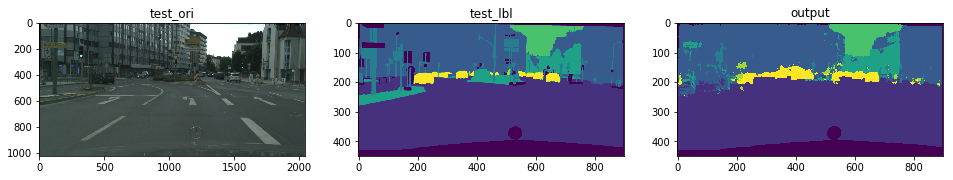

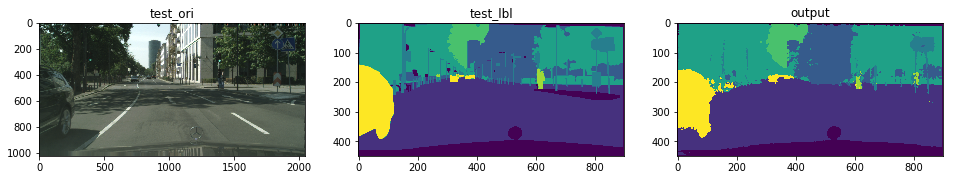

In [32]:
out_test = net(test_img)
for batch in range(batch_size):
    output_show(test_ori[batch], test_lbl[batch, :, :],out_test[batch, :, :, :], mode)
    #loss_test = criteria(out_test[batch, :, :, :], test_lbl[batch, :, :])
    #print (loss_test)